In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Brazilian Immigrant Population Analysis

In [3]:
year_2005 = pd.read_excel('Brazilian Immigrants 2005.xlsx')
year_2006 = pd.read_excel('Brazilian Immigrants 2006.xlsx')
year_2007 = pd.read_excel('Brazilian Immigrants 2007.xlsx')
year_2008 = pd.read_excel('Brazilian Immigrants 2008.xlsx')
year_2009 = pd.read_excel('Brazilian Immigrants 2009.xlsx')
year_2010 = pd.read_excel('Brazilian Immigrants 2010.xlsx')
year_2011 = pd.read_excel('Brazilian Immigrants 2011.xlsx')

year_tuple = (year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011)
years = [2005, 2006, 2007, 2008, 2009, 2010, 2011]

In [4]:
year_2005

,Type,State Code,1,2,4,5,6,8,9,10,...,41,42,44,45,47,48,49,51,53,55
0,Population,Population,2030,88,1288,861,25111,1339,14021,296,...,571,7019,1143,2339,1355,7921,2904,6471,2505,804
1,Age,Age 0 to 4,78,0,0,0,305,0,0,0,...,0,0,0,0,0,20,0,87,0,0
2,Age,Age 05 to 09,172,0,0,116,1039,84,333,0,...,0,157,0,0,0,283,182,1180,0,85
3,Age,Age 10 to 19,242,0,0,0,2920,0,1309,0,...,0,748,0,119,0,382,360,439,467,213
4,Age,Age 20 to 24,0,0,67,0,1910,0,2153,104,...,120,795,75,577,0,831,154,394,97,0
5,Age,Age 25 to 29,279,0,190,0,2788,372,2771,0,...,165,1404,0,439,823,2356,330,643,606,0
6,Age,Age 30 to 34,333,0,255,98,4239,83,1779,110,...,0,204,104,307,0,708,252,931,72,0
7,Age,Age 35 to 39,238,88,0,0,2857,207,2845,0,...,100,1313,198,72,0,702,891,298,554,203
8,Age,Age 40 to 44,365,0,61,385,3152,141,1133,0,...,106,654,695,519,0,730,384,691,254,0
9,Age,Age 45 to 49,323,0,61,156,2043,304,976,0,...,0,840,71,54,109,1023,105,926,376,0


In [64]:
male_count = []
female_count = []

for year in year_tuple:
    male_count.append(year[25][19])
    female_count.append(year[25][18])
    
print(male_count)
print(female_count)

[48207, 42170, 39875, 37934, 38999, 37401, 31259]
[40340, 33639, 28028, 33148, 30503, 35643, 31837]


In [82]:
# Graphs age distribution of a single year given the specific year dataframe and an int year (used for title)
def graph_age_range(year_data, year):
    ages = [year_data[25][age] for age in range(1, 18)]
    age_ranges = [year_data['State Code'][ranges] for ranges in range(1,18)]

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(age_ranges,ages)
    ax.set_ylim(0,18000)
    ax.set_ylabel('Number of Brazilians')
    ax.set_xlabel('Age Ranges')
    ax.set_title('Age Ranges for Brazilian Immigrant Population in Massachusetts for ' + year)
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')
    plt.show()
    
    return


# Graphs gender distribution of a single year given the specific year dataframe and an int year (used for title)
def graph_gender_distribution(year_data, year):
    genders = [year_data[25][gender] for gender in range(18, 20)]
    gender_ranges = [year_data['State Code'][ranges] for ranges in range(18,20)]

    total = year_data[25][0]
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(gender_ranges,genders, width = 0.5)
    ax.set_ylim(0,50000)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:.0%}'.format(height/total), (p.get_x()+.5*width, p.get_y() + height + 0.01), ha = 'center')
    
    ax.set_ylabel('Number of Brazilians')
    ax.set_xlabel('Gender')
    ax.set_title('Distribution of Genders for Brazilian Immigrant Population in Massachusetts for ' + year)
    plt.show()
    
    return

# Graphs the distribution of genders overtime 
def graph_gender_over_time(male_count, female_count, years):
    # data to plot
    n_groups = len(male_count)

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    plt.bar(index, male_count, bar_width,
        alpha=opacity,
        color='b',
        label='Men')

    plt.bar(index + bar_width, female_count, bar_width,
        alpha=opacity,
        color='r',
        label='Women')
    
    plt.xlabel('Years')
    plt.ylabel('Population')
    plt.title('Female and Male Brazilian Population in Massachusetts Over Time')
    plt.xticks(index + bar_width, years)
    plt.legend()

    plt.tight_layout()
    plt.show()


    return 

# Population

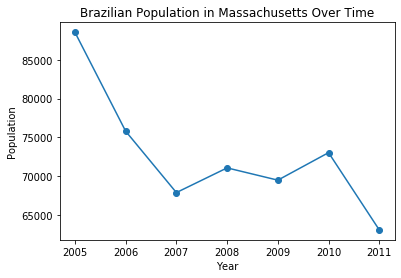

In [28]:
populations = [year_2005[25][0],year_2006[25][0], year_2007[25][0], year_2008[25][0], year_2009[25][0],
              year_2010[25][0], year_2011[25][0]]

plt.plot(years, populations, marker='o')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Brazilian Population in Massachusetts Over Time')
plt.show()

# Age

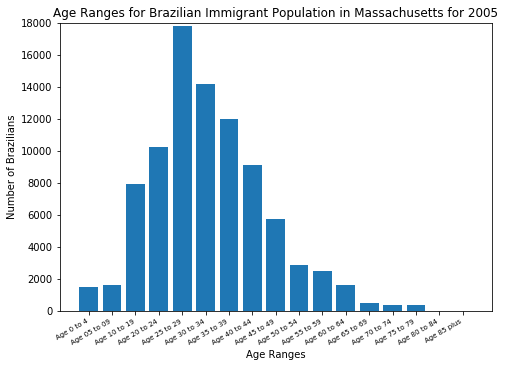

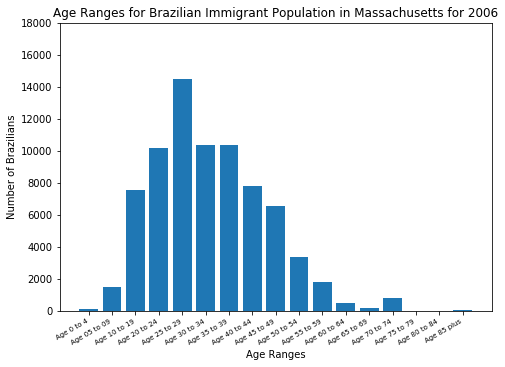

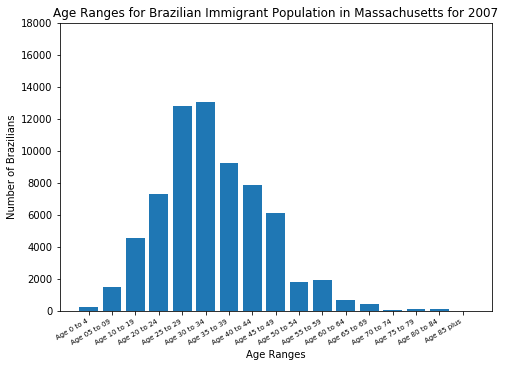

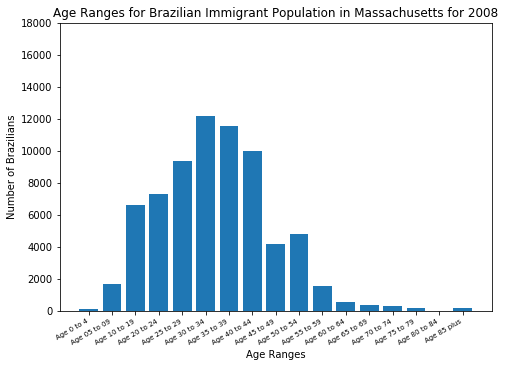

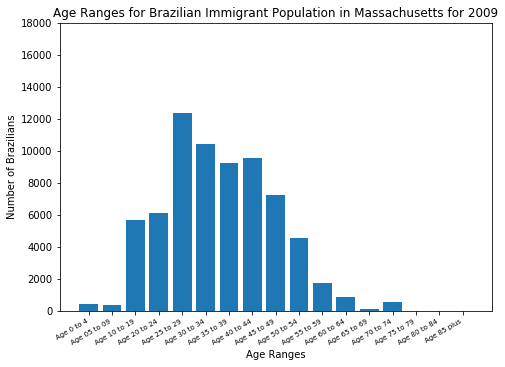

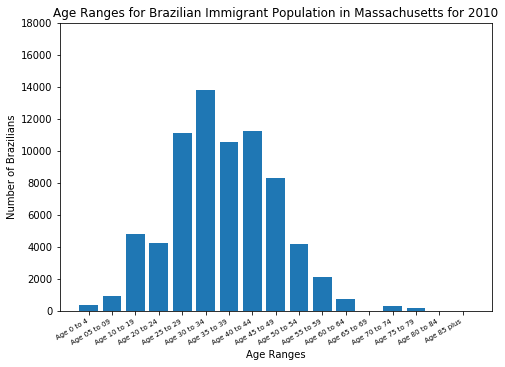

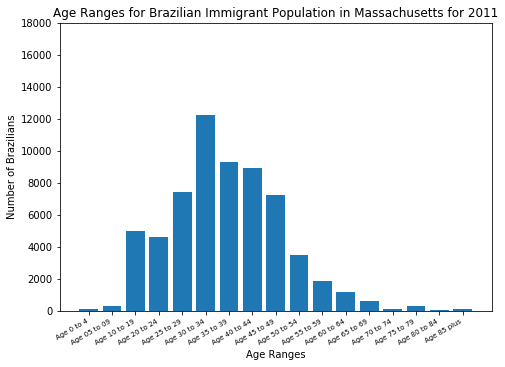

In [21]:
graph_age_range(year_2005, '2005')
graph_age_range(year_2006, '2006')
graph_age_range(year_2007, '2007')
graph_age_range(year_2008, '2008')
graph_age_range(year_2009, '2009')
graph_age_range(year_2010, '2010')
graph_age_range(year_2011, '2011')

## Gender

Male/Female Brazilian Population in Massachusetts by Year


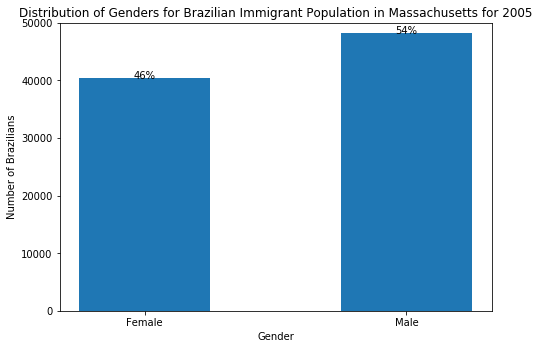

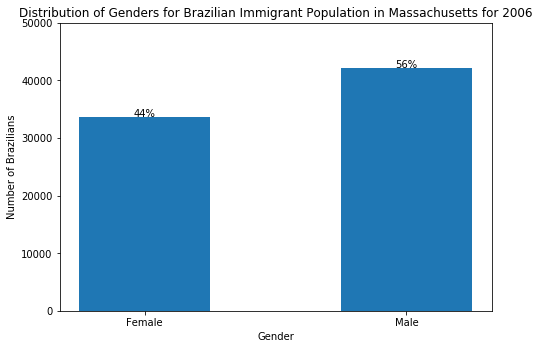

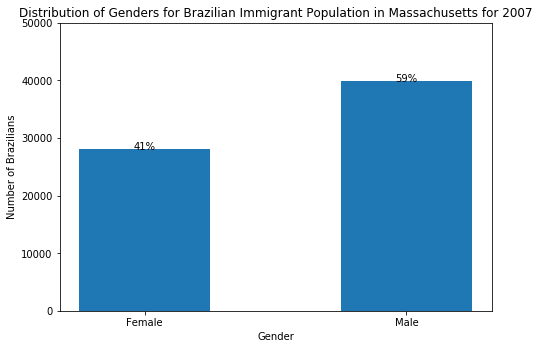

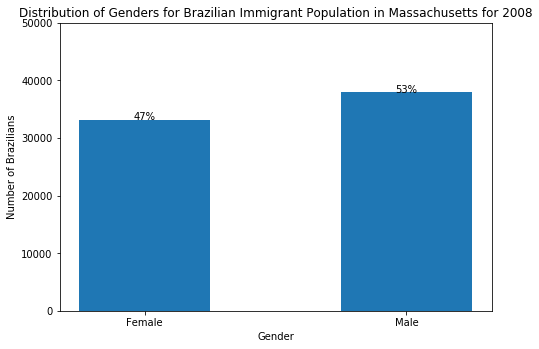

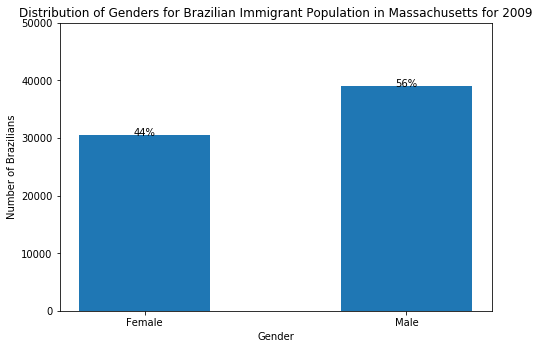

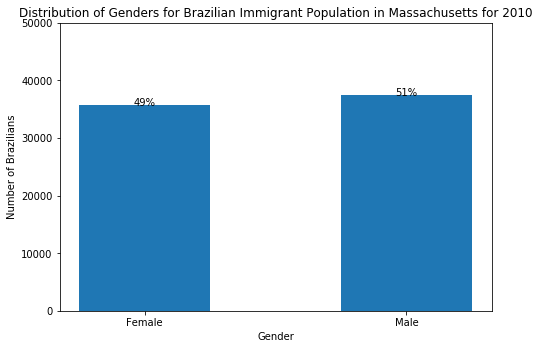

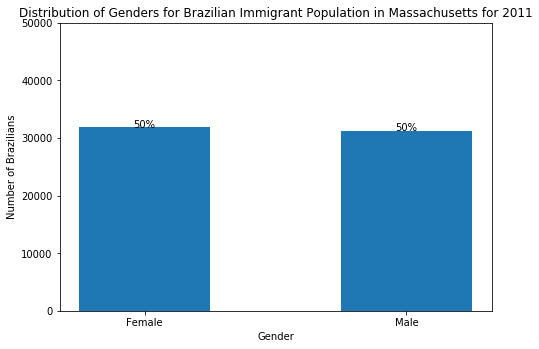

In [77]:
print("Male/Female Brazilian Population in Massachusetts by Year")

graph_gender_distribution(year_2005, '2005')
graph_gender_distribution(year_2006, '2006')
graph_gender_distribution(year_2007, '2007')
graph_gender_distribution(year_2008, '2008')
graph_gender_distribution(year_2009, '2009')
graph_gender_distribution(year_2010, '2010')
graph_gender_distribution(year_2011, '2011')

Male/Female Brazilian Population in Massachusetts Over Time


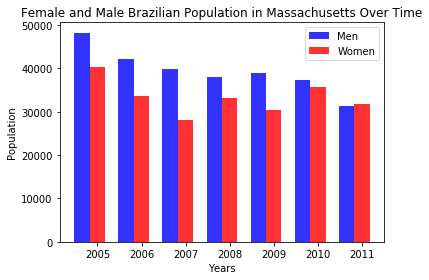

In [83]:
print("Male/Female Brazilian Population in Massachusetts Over Time")
graph_gender_over_time(male_count, female_count, years)
